# Notebook Basics and Customization



Jupyter Notebooks contain **text cells** (annotations in markdown format) and **code cells** (containing executable Python code).

The code cell below introduces some convenience functions to enable better styling/colouring of this document. The specific functions can be ignored. (Notice: they do not render properly on colab.google). 

In order to run/execute a cell you can move the cursor to cell of interest and either 

a) press the play button in the tool bar or 
b) press Shift-Enter simultaneously. 

The cell will update as indicated by an increasing number.

In [2]:
from IPython.display import HTML, display
from IPython.core.magic import register_cell_magic
    
def set_background(color):    
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)

    display(HTML('<img src onerror="{}">'.format(script)))
    
@register_cell_magic
def background(color, cell):
    set_background(color)

# Introduction: What are Models ?

- **Mechanistic** models: describe process in terms of parameters:
$$ \frac{d x}{d t} = f(x, \Theta) ~~~~~\mbox{e.g. Newton:}~ \frac{d p}{d t} = F(x,m,g)$$

     - simplifying assumption
     - causal input-output relations

- **Statistical** models: Describe data (distributions) in terms of parameters:
$$ X \propto f(\Theta) ~~~~~\mbox{e.g. Gauss:}~ X \propto N(\mu, \sigma^2)$$
  
  -  model $\ne$ mechanism
  -



## Statistical Models as Number Generators

Statistical models are machines that can generate numbers (according to some rules and given certain parameters). 

![human_height](https://ourworldindata.org/uploads/2019/06/distribution-1-775x550.png)

(Source: ourworldindata.org)




**Discussion**: Why are models useful?

- generated numbers corresponds to observed phenomena (height distribution)
- "rationalize observations"
- data compression
- ...


**Distinguish:** discrete and continuous distributions and give examples

# Sampling with Python

For the rest of the day we will only need some basic Python packages and libraries.
First they need to be installed and loaded. 

Notice that some libraries come with the standard python installation, others may already
have been pre-installed on the system.

In [ ]:
!pip list

## Install Libraries 
... this needs to be run only once (if the libraries below were not yet installed).

The %%script ... line prevents automatic execution when the whole notebook is run.

You can remove this line or comment it out if you need this installation step.


In [4]:
%%script echo skipping
!pip install matplotlib

skipping


## Load Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# line magic: enable plotting below code cell
%matplotlib inline 

## Sampling from Poisson

- generates integer numbers $X\ge 0$
- **useful** for count data (horse accidents per year, number of birth per year, sequence reads per genome region)
- **simple:** only one parameter, $\lambda$ (=expected counts)


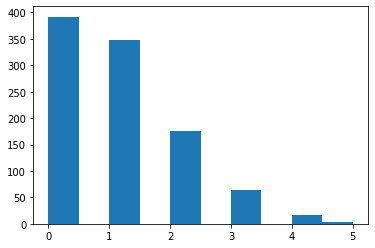

In [5]:
np.random.seed(42)
X = np.random.poisson(lam=1.0, size=1000)
H = plt.hist(X)

## Exploration
**Group Task (15 min):**  Which other (famous) distributions are possible ? 
Explore and modify the cell below, and report back to group.

Report back:
- which distribution ?
- how many parameters ?
- what is it useful for ?

In [6]:
%%background Bisque
%%script echo skipping
X = np.random.[YOUR CHOICE HERE]
H = plt.hist(X)

## barplot for discrete distributions
#labels, counts = np.unique(X, return_counts=True)
#B = plt.bar(labels, counts, align='center', width=0.2)

**Some ideas:**

- Change parameters
- change size
- chose another distribution
- barplot instead of histogram

Some suggestions can be found here: https://en.wikipedia.org/wiki/List_of_probability_distributions#Discrete_distributions

And their Python/numpy implementations are here: https://numpy.org/doc/1.16/reference/routines.random.html

Try "Shift-Tab" to activate Jupyter help (next to your module of interest), or try "np.random.choice?"


## Sampling from (any) distribution

We can build our own machine ...

CBCCCBCCCBACCCCCBCBCCCAABBBCBBCCCACAACBCCCCACCCCACBCCBCBCCCCCBBBBCCCBCCACCACCBCCCCCCCACCCACBBBCCCBCC


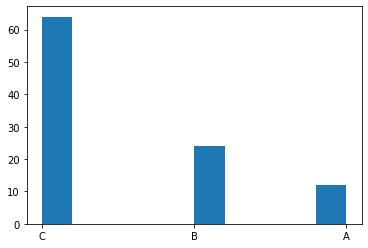

In [7]:
L    = ['A',  'B',  'C']     # define a list of my favorite countries
prob = [0.1, 0.2, 0.7]       # define corresponding probabilities 
X = np.random.choice(a=L, p=prob, size=100)
print(*X, sep='')
H = plt.hist(X)

**Discussion:** Is it useful? How many parameters does it have?

**Lesson:** Sampling is not confined to numbers. In general we sample from sets ("events", "states").

**Task (5 min):** What happens if we
1. remove  p=prob
2. replace p=[0.5, 0.5, 0.1]
2. replace size=[250,4] or remove this parameter

Try it out below and consult https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

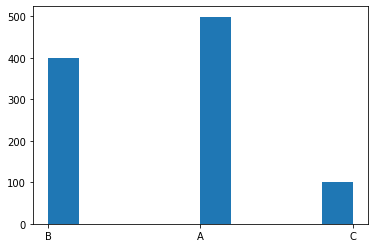

In [8]:
X = np.random.choice(a=L,  p=[0.5, 0.4, 0.1], size=1000)
H = plt.hist(X)